In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Use LaTeX-like math text
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "font.size": 14,
})

# ----------------------------
# Helper drawing functions
# ----------------------------
def draw_sites(ax, x, labels):
    ax.scatter(x, np.zeros_like(x), s=60, color="black", zorder=3)
    for xi, lab in zip(x, labels):
        ax.text(xi, -0.15, rf"${lab}$", ha="center", va="top")

def draw_bond(ax, x1, x2, J, label=None, dashed=False, color = "black"):
    lw = 0.8 + 6 * J
    style = "--" if dashed else "-"
    ax.plot([x1, x2], [0, 0], style, color=color, lw=lw, zorder=1)
    if label is not None:
        ax.text((x1 + x2) / 2, 0.1, rf"${label}$", ha="center")

def draw_chain_ends(ax, x_left, x_right):
    ax.plot([x_left - 0.4, x_left], [0, 0], "--", color="black")
    ax.plot([x_right, x_right + 0.4], [0, 0], "--", color="black")

def draw_cross_on_bond(ax, x1, x2, size=0.04):
    xm = 0.5 * (x1 + x2)
    ax.plot([xm - size, xm + size], [-size, size], color="red", lw=2)
    ax.plot([xm - size, xm + size], [size, -size], color="red", lw=2)

def draw_singlet(ax, x1, x2, height=0.25):
    xs = np.linspace(x1, x2, 200)
    ys = height * np.sin(np.pi * (xs - x1) / (x2 - x1))
    ax.plot(xs, ys, color="purple", lw=2)

def draw_semi_singlet(ax, x, dir, height=0.25):
    if dir == "left":
        x1 = x-1
        x2 = x
    elif dir =="right":
        x1 = x
        x2 = x+1
    xs = np.linspace(x1, x2, 200)
    ys = height * np.sin(np.pi * (xs - x1) / (x2 - x1))
    ax.plot(xs, ys, "--", color="purple", lw=2)

def format_ax(ax):
    ax.set_ylim(-0.3, 0.6)
    ax.set_axis_off()

# ----------------------------
# Model parameters
# ----------------------------
positions = np.array([1, 2, 3, 4, 5, 6])
labels = ["l-2", "l-1", "l", "l+1", "l+2", "l+3"]

J_lm1 = 0.08
Omega = 1.0
J_lp1 = 0.07

J_vals = [0.12, J_lm1, Omega, J_lp1, 0.1]

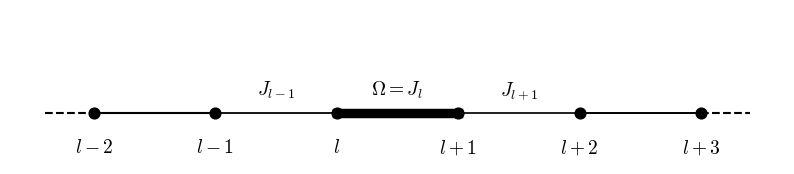

In [11]:
# ----------------------------
# PANEL 1: Original chain
# ----------------------------
fig, ax = plt.subplots(figsize=(10, 2))

draw_chain_ends(ax, positions[0], positions[-1])

for i in range(5):
    label = None
    if i == 1:
        label = r"J_{l-1}"
    elif i == 2:
        label = r"\Omega = J_{l}"
    elif i == 3:
        label = r"J_{l+1}"
    draw_bond(ax, positions[i], positions[i+1], J_vals[i], label=label)

draw_sites(ax, positions, labels)
format_ax(ax)
# plt.show()
plt.savefig("presentation_figures/chain.pdf", bbox_inches="tight")

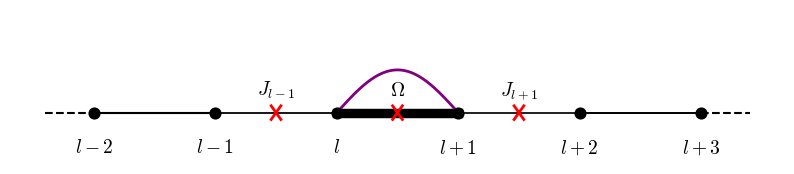

In [ ]:
# ----------------------------
# PANEL 2: Decimation + singlet
# ----------------------------
fig, ax = plt.subplots(figsize=(10, 2))

draw_chain_ends(ax, positions[0], positions[-1])

for i in range(5):
    label = None
    if i == 1:
        label = r"J_{l-1}"
    elif i == 2:
        label = r"\Omega"
    elif i == 3:
        label = r"J_{l+1}"
    draw_bond(ax, positions[i], positions[i+1], J_vals[i], label=label)

# Singlet between l and l+1
draw_singlet(ax, positions[2], positions[3])

# Eliminated bonds
draw_cross_on_bond(ax, positions[1], positions[2])
draw_cross_on_bond(ax, positions[2], positions[3])
draw_cross_on_bond(ax, positions[3], positions[4])

draw_sites(ax, positions, labels)
format_ax(ax)
# plt.show()
plt.savefig("presentation_figures/decimation_figure.pdf", bbox_inches="tight")

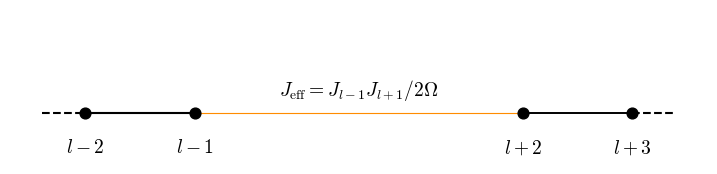

In [20]:
# ----------------------------
# PANEL 3: Effective chain
# ----------------------------
positions_eff = np.array([1, 2, 5, 6])
labels_eff = ["l-2", "l-1", "l+2", "l+3"]

J_eff = J_lm1 * J_lp1 / (2 * Omega)

fig, ax = plt.subplots(figsize=(9, 2))

draw_chain_ends(ax, positions_eff[0], positions_eff[-1])

draw_bond(ax, positions_eff[0], positions_eff[1], J_vals[0])
draw_bond(ax, positions_eff[1], positions_eff[2], J_eff, label=r"J_{\mathrm{eff}}= J_{l-1}J_{l+1}/2\Omega", color="darkorange")
draw_bond(ax, positions_eff[2], positions_eff[3], J_vals[-1])

draw_sites(ax, positions_eff, labels_eff)
format_ax(ax)
# plt.show()
plt.savefig("presentation_figures/effective_bond_figure.pdf", bbox_inches="tight")

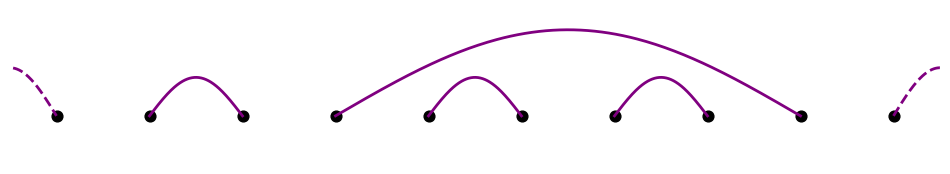

In [4]:

# --- PANEL 4: random-singlet phase -------------------------------------------

plt.figure(figsize=(12, 2))
ax = plt.gca()

N = 10
positions4 = list(range(1, N+1))

# draw sites
for x in positions4:
    ax.scatter([x], [0], s=60, color="black")

# non-crossing singlets across a chain
singlets = [(2,3), (4,9), (5,6), (7,8)]

for (i, j) in singlets:
    draw_singlet(ax, i, j, height=((j-i)**0.5)*0.2)

draw_semi_singlet(ax, 1, "left")
draw_semi_singlet(ax, 10, "right")

ax.set_ylim(-0.25, 0.55)
ax.set_xlim(0.5, N+0.5)
ax.set_axis_off()
# plt.show()
plt.savefig("presentation_figures/random_singlet_phase_2.pdf", bbox_inches="tight")
